In [207]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [208]:
path = 'test/test4.jpg'

In [209]:
img1 = cv2.imread('source/template3.jpg')  # 替换为你的第一张图片路径
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [210]:
# 椭圆参数
center_coordinates = (int(884), int(554))  # 椭圆中心 (x, y)
axes_lengths = (int(448.944 / 2), int(446.030 / 2))  # OpenCV使用半轴
angle = 0
start_angle = 0  # 起始角度
end_angle = 360  # 终止角度
color = (255, 255, 255)  # 白色椭圆 (RGB)
thickness = 2  # 椭圆线的厚度

In [211]:
gray_img2 = cv2.ellipse(img1, center_coordinates, axes_lengths, angle, start_angle, end_angle, color, thickness)

In [212]:
# # 使用matplotlib显示结果
# plt.figure(figsize=(16,16))
# plt.imshow(gray_img2)
# plt.axis('off')  # 隐藏坐标轴
# plt.show()
    


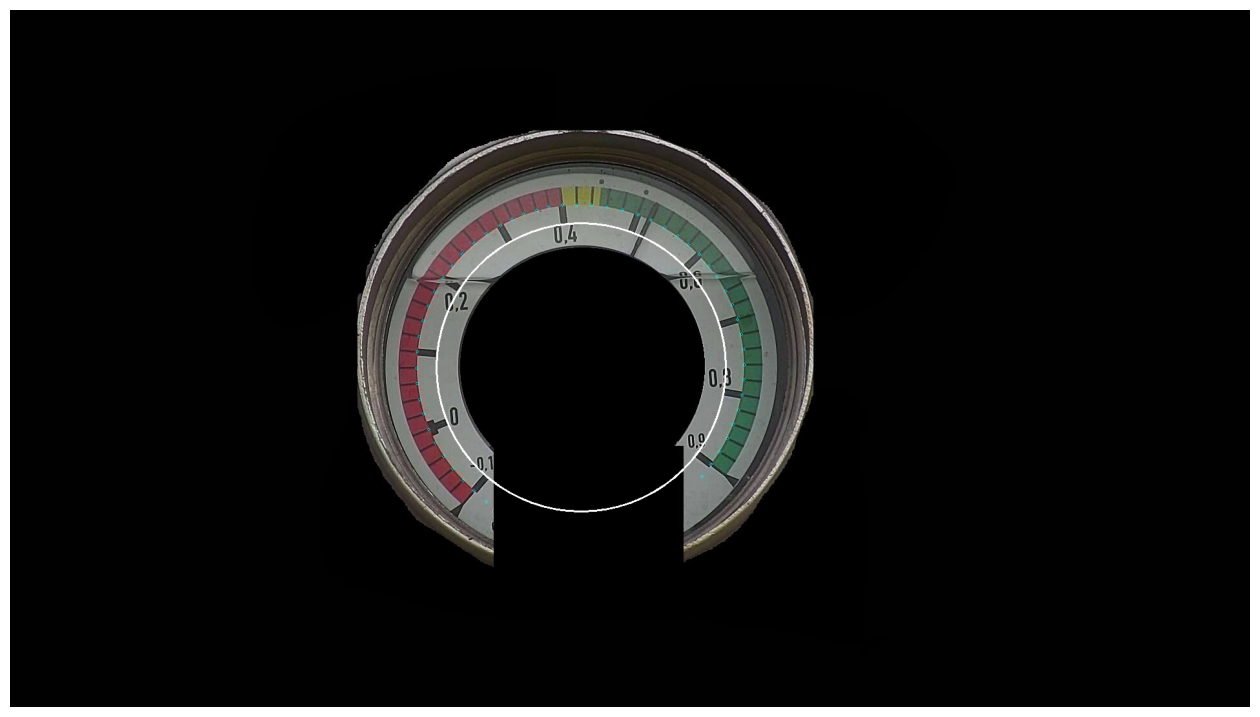

In [213]:
standard_point = [
    (737,762),
    (718,745), (701,729), (685,711), (671,692), (658,671),
    (648,650), (640,626), (634,604), (630,579), (629,555),
    (630,530), (633,506), (639,482), (647,459), (657,437),
    (670,416), (684,397), (700,379), (718,362), (737,347),
    (759,334), (777,325), (795,317), (815,311), (834,306),
    (855,303), (877,303), (900,303), (924,306), (948,310),
    (972,318), (992,326), (1013,337), (1033,350),(1050,364),
    (1067,379), (1082,397), (1094,414), (1108,436),(1118,457),
    (1126,480), (1132,503), (1136,526), (1137,550),(1136,573),
    (1133,597), (1128,620), (1120,642), (1111,664), (1099,685),
    (1085,704), (1071,723)
]

img_copy = gray_img2.copy()
for point in standard_point:
    cv2.circle(img_copy, point, radius=2, color=(0,255,255))
    
plt.figure(figsize=(16,16))
plt.imshow(img_copy)
plt.axis('off')  # 隐藏坐标轴
plt.show()
    

In [214]:
def sperate_point(point1, point2):

    # 计算向量1和向量2
    vector1 = (point1[0] - center_coordinates[0], point1[1] - center_coordinates[1]) 
    vector2 = (point2[0] - center_coordinates[0], point2[1] - center_coordinates[1]) 

    # 计算与水平轴的夹角（弧度）
    theta1 = np.arctan2(vector1[1], vector1[0])
    theta2 = np.arctan2(vector2[1], vector2[0])
    
    if theta1 > theta2: theta2 += math.pi * 2
    # print(theta1, theta2)
    # # 生成中间点
    num_points = 10  # 等分点数
    t_values = np.linspace(theta1, theta2, num_points + 1)  # 等间距划分
    
    # # 计算椭圆上的点（在椭圆旋转前）
    points = []
    for t in t_values:
        x = axes_lengths[0] * np.cos(t)
        y = axes_lengths[1] * np.sin(t)
    
        # # 应用旋转变换
        rotation_matrix = np.array([
            [np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
            [np.sin(np.radians(angle)), np.cos(np.radians(angle))]
        ])

        rotated_point = rotation_matrix @ np.array([x, y])
        points.append((int(rotated_point[0] + center_coordinates[0]), int(rotated_point[1] + center_coordinates[1])))

    # # 绘制分点，并显示红色端点
    # for i, point in enumerate(points):
    #     if i % 2 : continue
    #     color = (0, 0, 255) if i == 0 or i == len(points) - 1 else (0, 255, 0)  # 红色端点，绿色中间点
    #     cv2.circle(gray_img2, point, radius=1, color=color, thickness=-1)
    return points

In [215]:
candidate_point = []
for i in range(len(standard_point) - 1):
    # print(standard_point[i], standard_point[i+1])
    res_point = sperate_point(standard_point[i], standard_point[i + 1])
    if len(candidate_point) and res_point[0] == candidate_point[-1]: 
        candidate_point += res_point[1:]
    else: candidate_point += res_point
    
    # print(candidate_point)
    # break

In [216]:
# color = (0, 0, 255) 
# cv2.circle(gray_img2, (752, 734), radius=1, color=color, thickness=-1)

# img_copy = gray_img2.copy()
# for i, point in enumerate(candidate_point):
#     if i % 10 : continue
#     color = (0, 0, 255) 
#     cv2.circle(img_copy, point, radius=1, color=color, thickness=-1)
    
    
# plt.figure(figsize=(16,16))
# plt.imshow(img_copy)
# plt.axis('off')  # 隐藏坐标轴
# plt.show()

In [217]:
img1 = cv2.imread('source/template3.jpg')  # 替换为你的第一张图片路径
img2 = cv2.imread(path)  # 替换为你的第二张图片路径

# 将图片转换为灰度图像
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

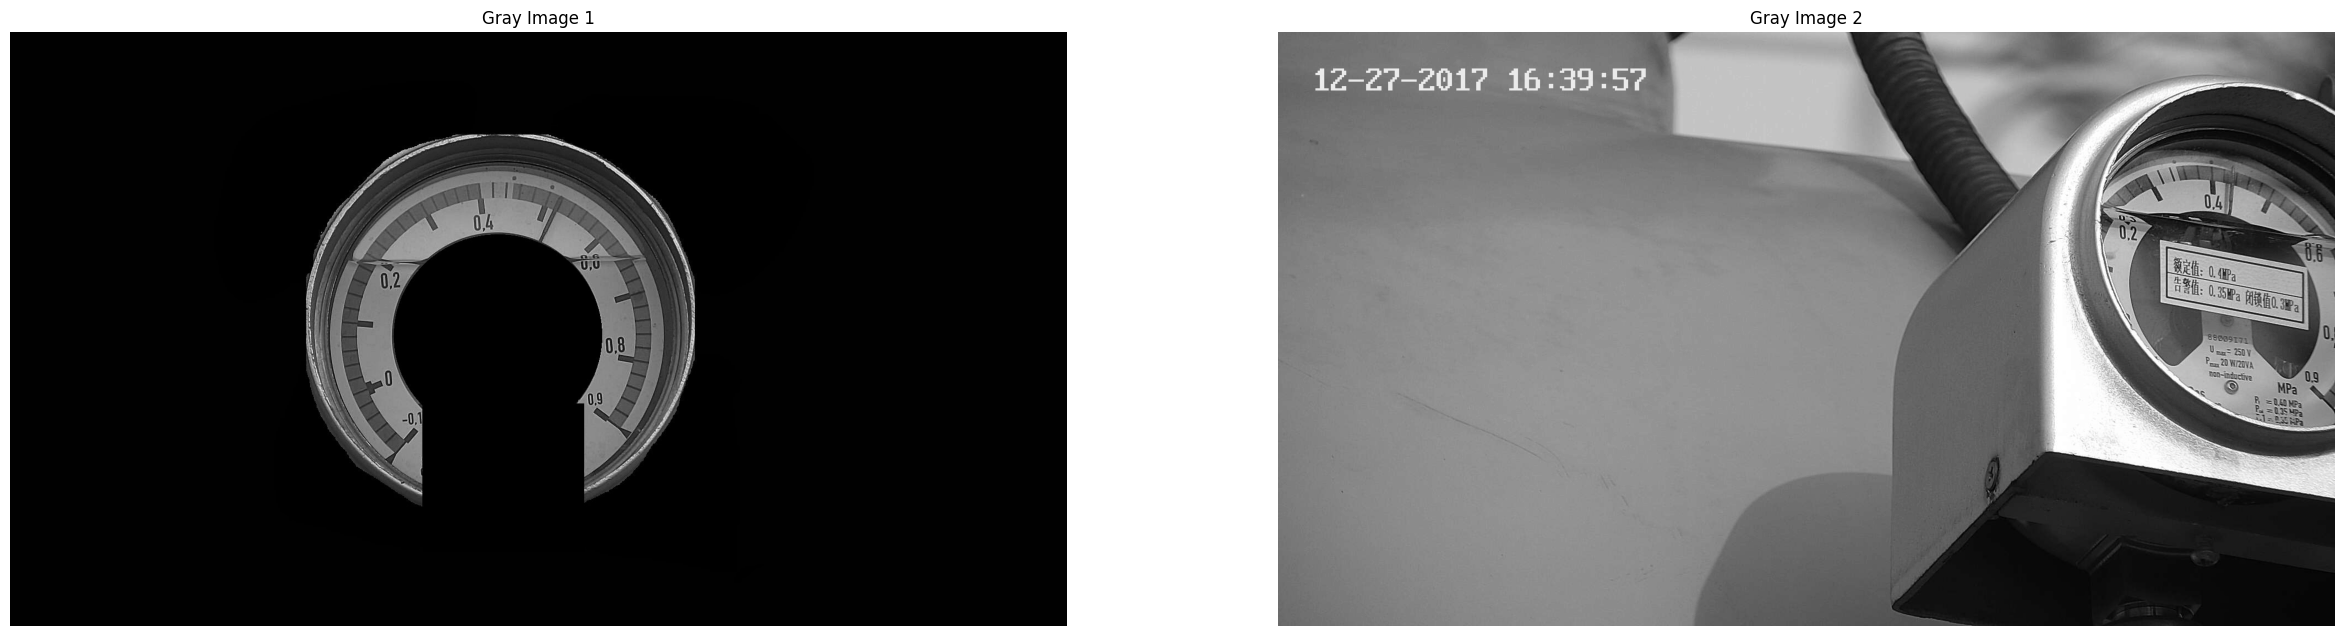

In [218]:
# # 使用 matplotlib 展示图片
plt.figure(figsize=(30, 15))

# 显示第一张灰度图
plt.subplot(1, 2, 1)
plt.imshow(gray_img1, cmap='gray')
plt.title('Gray Image 1')
plt.axis('off')  # 关闭坐标轴

# 显示第二张灰度图
plt.subplot(1, 2, 2)
plt.imshow(gray_img2, cmap='gray')
plt.title('Gray Image 2')
plt.axis('off')  # 关闭坐标轴

# 展示图片
plt.show()

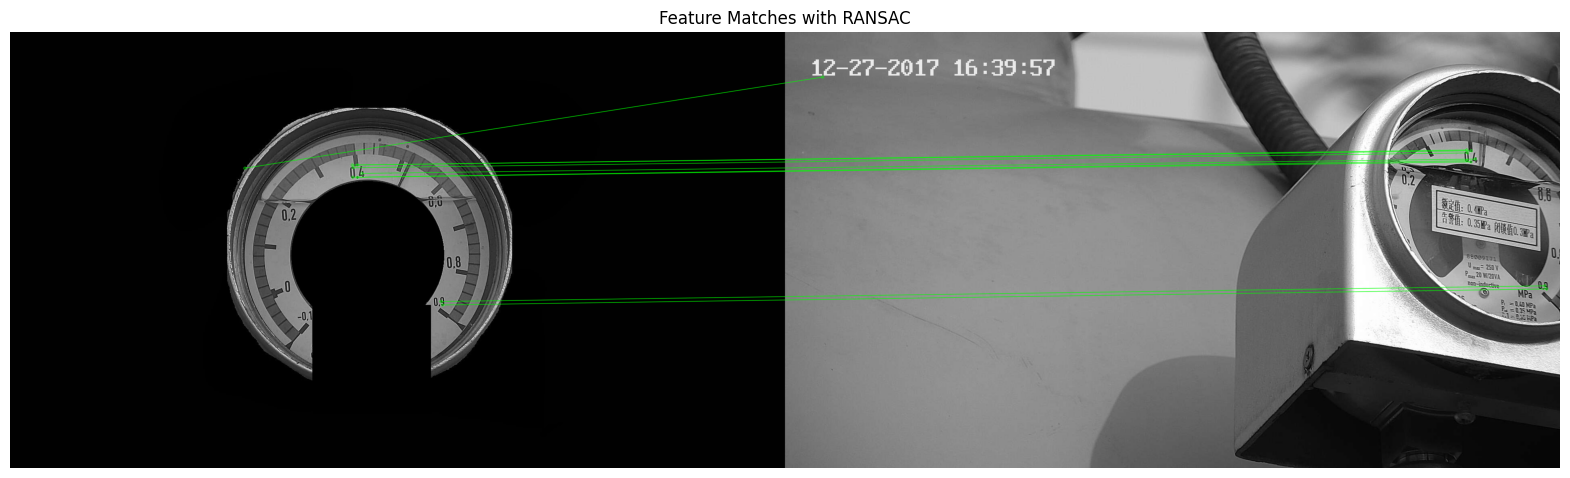

In [219]:

akaze = cv2.AKAZE_create()
# 检测关键点和计算描述符
keypoints1, descriptors1 = akaze.detectAndCompute(gray_img1, None)
keypoints2, descriptors2 = akaze.detectAndCompute(gray_img2, None)
# 使用 BFMatcher 匹配描述符
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
# 按照距离将匹配结果排序
matches = sorted(matches, key=lambda x: x.distance)

# 只保留前50个匹配（可调整）
good_matches = matches[:300]
        

if len(good_matches) > 4:  # At least 4 points needed to compute homography
    # 获取匹配点的坐标
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    # 计算单应矩阵
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    height, width, _ = img2.shape
    warped_img = cv2.warpPerspective(img1, H, (width, height))
    # Draw only inliers (matches used in homography)
    matches_mask = mask.ravel().tolist()
    draw_params = dict(matchColor=(0, 255, 0),  # Green color for inliers
                       singlePointColor=None,
                       matchesMask=matches_mask,  # Only draw inliers
                       flags=2)
else: 
    print("Not enough matches found to compute homography.")



result_img = cv2.drawMatches(gray_img1, keypoints1, gray_img2, keypoints2, good_matches, None, **draw_params)
# Display the matches
plt.figure(figsize=(20, 10))
plt.imshow(result_img)
plt.title('Feature Matches with RANSAC')
plt.axis('off')
plt.show()


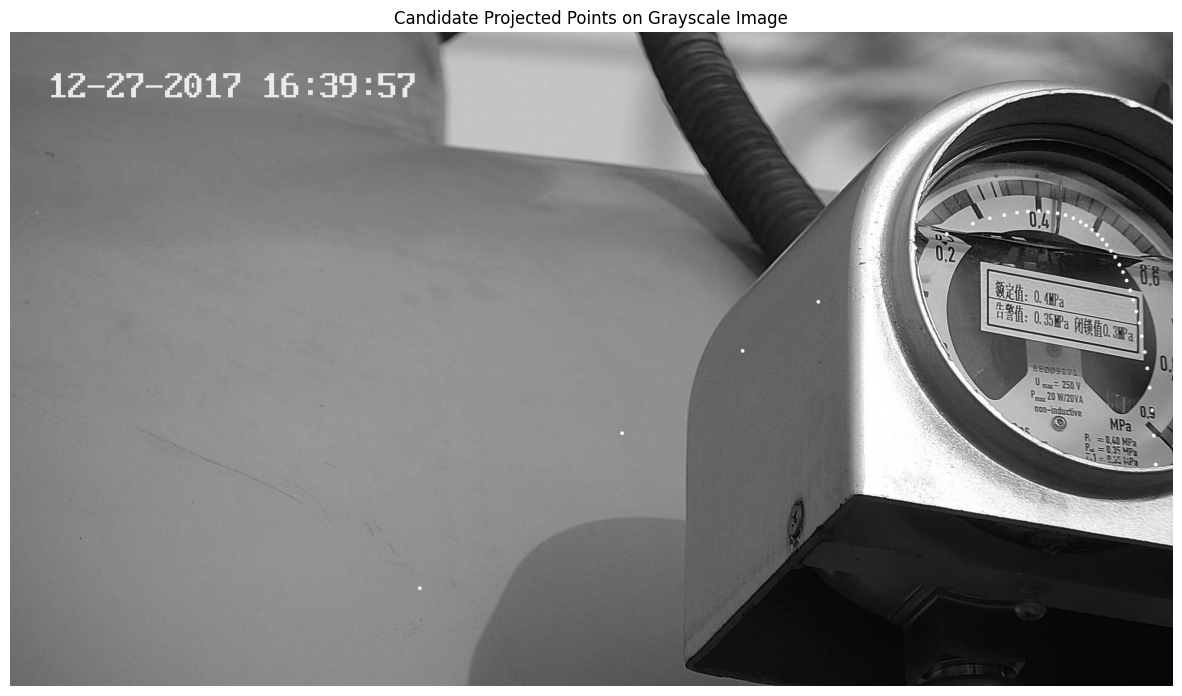

In [220]:
candidate_point = np.array(candidate_point, dtype=np.float32).reshape(-1, 1, 2)
candidate_projected_points = cv2.perspectiveTransform(candidate_point, H)
# 在 img2 上绘制投影点

img_copy = gray_img2.copy()
# 在 matplotlib 中使用 scatter 绘制彩色点
for i, point in enumerate(candidate_projected_points):
    if i % 10 : continue
    x, y = int(point[0][0]), int(point[0][1])
    cv2.circle(img_copy, (x, y), radius=3, color=(255, 0, 0), thickness=-1)

# Display the modified grayscale image with colored points
plt.figure(figsize=(15, 15))  # Set the figure size before imshow
plt.imshow(img_copy, cmap='gray')  # Show the image
plt.title('Candidate Projected Points on Grayscale Image')
plt.axis('off')  # Hide axis
plt.show()

In [221]:
print( candidate_projected_points[110 + 1][0] )
print( candidate_projected_points[110 - 1][0] )

[ 19240.305 -14377.085]
[ 9245.857 -6159.72 ]


In [222]:
alpha = [0 for i in range(501)]
for i in range(10, 510 + 1): 
    sum_k, cnt_empty = 0, 0
    for j in range(1,10 + 1):
        if i + j >= 520: continue
        delta_y = candidate_projected_points[i+j][0][1] - candidate_projected_points[i-j][0][1]
        delta_x = candidate_projected_points[i+j][0][0] - candidate_projected_points[i-j][0][0]

        if math.fabs(delta_x) < 1e-6: cnt_empty += 1
        else:
            sum_k += delta_y / delta_x

    if cnt_empty > 5 : alpha[i - 10] = 0.0
    else: 
        k_i =  sum_k / ( 10 - cnt_empty )
        if math.fabs(k_i) < 1e-6 : 
            alpha[i - 10] = 90.0
        else: 
            alpha[i - 10] = math.atan(-1 / k_i) * 180 / math.pi

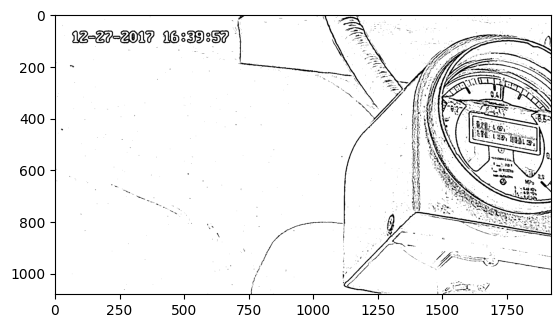

In [223]:
w = 40
img_copy = gray_img2.copy()
img_copy = cv2.medianBlur(img_copy, 7)


img_copy  = cv2.adaptiveThreshold(img_copy , 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 
                                        11, 2)

plt.imshow(img_copy, cmap='gray')
plt.show()

0 读数 = -0.1MPa sumP = 0.0
1 读数 = -0.098MPa sumP = 0.0
2 读数 = -0.096MPa sumP = 0.0
3 读数 = -0.094MPa sumP = 0.0
4 读数 = -0.092MPa sumP = 0.0
5 读数 = -0.09MPa sumP = 0.0
6 读数 = -0.088MPa sumP = 0.0
7 读数 = -0.086MPa sumP = 0.0
8 读数 = -0.084MPa sumP = 0.0
9 读数 = -0.082MPa sumP = 0.0
10 读数 = -0.08MPa sumP = 0.0
11 读数 = -0.078MPa sumP = 0.0
12 读数 = -0.076MPa sumP = 0.0
13 读数 = -0.074MPa sumP = 0.0
14 读数 = -0.072MPa sumP = 0.0
15 读数 = -0.07MPa sumP = 0.0
16 读数 = -0.068MPa sumP = 0.0
17 读数 = -0.066MPa sumP = 0.0
18 读数 = -0.064MPa sumP = 0.0
19 读数 = -0.062MPa sumP = 0.0
20 读数 = -0.06MPa sumP = 0.0
21 读数 = -0.058MPa sumP = 0.0
22 读数 = -0.056MPa sumP = 0.0
23 读数 = -0.054MPa sumP = 0.0
24 读数 = -0.052MPa sumP = 0.0
25 读数 = -0.05MPa sumP = 0.0
26 读数 = -0.048MPa sumP = 0.0
27 读数 = -0.046MPa sumP = 0.0
28 读数 = -0.044MPa sumP = 0.0
29 读数 = -0.042MPa sumP = 0.0
30 读数 = -0.04MPa sumP = 0.0
31 读数 = -0.038MPa sumP = 0.0
32 读数 = -0.036MPa sumP = 0.0
33 读数 = -0.034MPa sumP = 0.0
34 读数 = -0.032MPa sumP = 0.0
35 

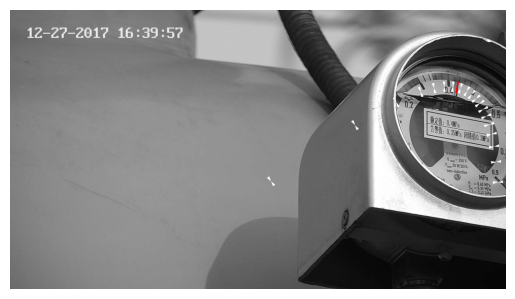

In [225]:
def cross(x1,y1,x2,y2):
    return x1 * y2 - x2 * y1
def sgn(x):
    if math.fabs(x) < 1e-6: return 0
    return 1 if x > 0 else -1

theta = 15
res_i, min_pixel = 0, 1e9


img_show = gray_img2.copy()

for i in range(0,len(alpha)):
    
    x = candidate_projected_points[i+10][0][0]
    y = candidate_projected_points[i+10][0][1]
    
    alpha_rad = math.radians(alpha[i])
    theta_rad = math.radians(theta)
    
    vec1_x = math.cos(alpha_rad + theta_rad)
    vec1_y = math.sin(alpha_rad + theta_rad)

    # Coordinates of vec2 (rotated counterclockwise)
    vec2_x = math.cos(alpha_rad - theta_rad)
    vec2_y = math.sin(alpha_rad - theta_rad)
    
    x_min, x_max, y_min, y_max = int(x - w/2), int(x + w/2), int(y - w/2), int(y + w/2)
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, 1920)
    y_max = min(y_max, 1080)
    

    sum_pixel = 0
    cnt_insied_pixel = 0

    for ty in range(y_min, y_max):
        for tx in range(x_min, x_max):
            vx, vy = tx - x, ty - y
            if vx ** 2 + vy **2 > (w/2) ** 2: continue
            
            if sgn( cross(vec1_x, vec1_y, vx, vy) ) * sgn( cross(vec2_x, vec2_y, vx, vy) ) <= 0:
                if i%20 == 0: img_show[ty,tx] = 255
                sum_pixel += img_copy[ty,tx]
                cnt_insied_pixel += 1
                
    if cnt_insied_pixel > 70 and sum_pixel/cnt_insied_pixel < min_pixel: 
        min_pixel = sum_pixel/cnt_insied_pixel 
        res_i = i    
        # plt.plot([x_start, x_end], [y_start, y_end], color='red', linewidth=1)
    P =( i / 500) * 1.0 - 0.1
    print(f'{i} 读数 = {round(P, 3)}MPa sumP = {sum_pixel/(cnt_insied_pixel+1e-12)}')

res_x = candidate_projected_points[res_i+10][0][0]
res_y = candidate_projected_points[res_i+10][0][1]
alpha_i = np.radians(alpha[res_i])
x_start = res_x - (w / 2) * np.cos(alpha_i)
y_start = res_y - (w / 2) * np.sin(alpha_i)
x_end = res_x + (w / 2) * np.cos(alpha_i)
y_end = res_y + (w / 2) * np.sin(alpha_i)
P =( res_i / 500) * 1.0 - 0.1
print(P)
print(f'读数 = {round(P, 2)}MPa')
# 绘制图像


# img_show = gray_img2.copy()
plt.imshow(img_show, cmap='gray')

# 绘制线段，红色
plt.plot([x_start, x_end], [y_start, y_end], color='red', linewidth=1)
# 关闭坐标轴
plt.axis('off')
# plt.savefig(save_path+f'{round(P, 2)}MPa.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

In [206]:

print(res_i)
P =( res_i / 500) * 1.0 - 0.1
print(P)
print(f'读数 = {round(P, 2)}MPa')

268
0.43600000000000005
读数 = 0.44MPa
